In [1]:
! pip install -q kaggle

####Importing Libraries

In [2]:
import keras
import os
import zipfile
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sn

from google.colab import files

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

####Uploading Kaggle API

In [ ]:
files.upload()

####Acquiring Data Phase

In [4]:
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d akkithetechie/furniture-detector

 97% 225M/232M [00:05<00:00, 35.8MB/s]
100% 232M/232M [00:05<00:00, 44.5MB/s]


In [6]:
with zipfile.ZipFile('furniture-detector.zip','r') as z:
  z.extractall('./')

####Data Visualization

In [7]:
def show_data_count(dir):
  arr = []
  for root, dirs, files in os.walk(dir):
    count = 0
    for name in files:
      if name.endswith('.jpg'):
        count += 1
    if count != 0:
      arr.append(count)
  return arr

In [8]:
list_of_data = []
for root, dirs, files in os.walk('./furniture-images/img/train'):
  list_of_data = dirs
  break

In [9]:
images = []
for root, dirs, files in os.walk('./furniture-images/img/train'):
  count = 0
  for name in files:
    if count !=5:
      images.append(os.path.join(root, name))
      count += 1
    else:
      break

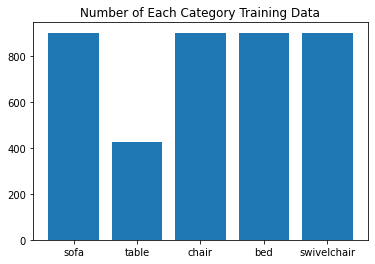

In [10]:
train_data_count = show_data_count('./furniture-images/img/train')
fig, ax = plt.subplots()
ax.bar(list_of_data, train_data_count)
# ax.set_xticklabels(list_of_data)
plt.title('Number of Each Category Training Data')
plt.show()

Text(0.5, 1.0, 'Number of Each Category Validation Data')

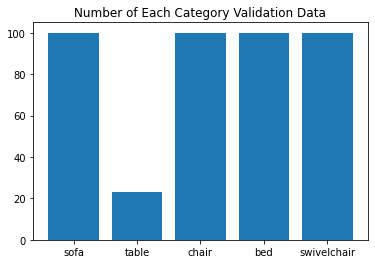

In [11]:
test_data_count = show_data_count('./furniture-images/img/val')
fig, ax = plt.subplots()
ax.bar(list_of_data, test_data_count)
plt.title('Number of Each Category Validation Data')

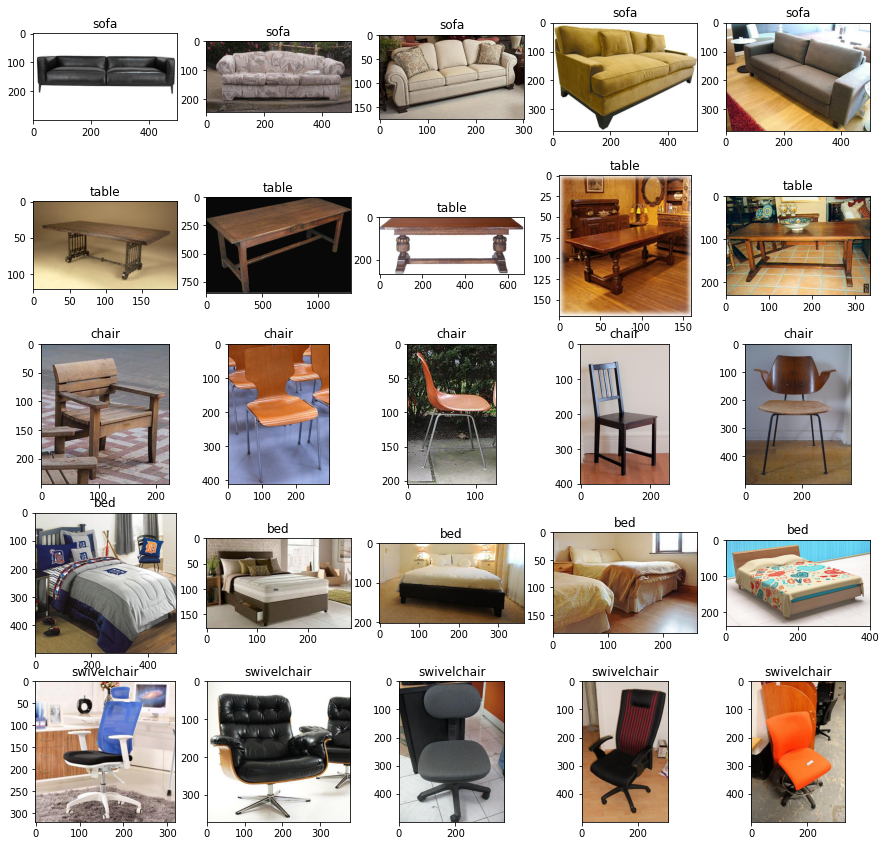

In [12]:
fig = plt.figure(figsize=(15,15))
column = 5
row = 5
for i in range(len(images)):
  img = mpimg.imread(images[i])
  fig.add_subplot(row, column, i+1)
  plt.imshow(img)
  plt.title(images[i].split('/')[4])
plt.show()

####Image Augmentation

In [13]:
train_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    zoom_range = 0.02,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1/255.0
)

train_data = train_datagen.flow_from_directory(
    directory = './furniture-images/img/train',
    target_size = (180, 180),
    batch_size = 64,
    shuffle=True
)

validation_data = validation_datagen.flow_from_directory(
    directory = './furniture-images/img/val',
    target_size = (180, 180),
    batch_size = 64
)

Found 4024 images belonging to 5 classes.
Found 423 images belonging to 5 classes.


####Model Making

In [37]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(128, (3,3), input_shape=(180,180,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.15),
                                    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation="relu"),
                                    tf.keras.layers.Dense(5, activation="softmax")
])

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 178, 178, 128)     3584      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 89, 89, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 87, 87, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 43, 43, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 43, 43, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 41, 41, 64)        73792     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 20, 20, 64)       

In [39]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics='accuracy',
              )

In [40]:
history = model.fit(train_data,
                    epochs=30,
                    validation_data = validation_data,
                    )

Epoch 1/30
63/63 [==============================] - 34s 533ms/step - loss: 1.5022 - accuracy: 0.3330 - val_loss: 1.3258 - val_accuracy: 0.4255
Epoch 2/30
63/63 [==============================] - 33s 518ms/step - loss: 1.2506 - accuracy: 0.4908 - val_loss: 1.0997 - val_accuracy: 0.5390
Epoch 3/30
63/63 [==============================] - 33s 518ms/step - loss: 1.1421 - accuracy: 0.5517 - val_loss: 0.9373 - val_accuracy: 0.6383
Epoch 4/30
63/63 [==============================] - 33s 521ms/step - loss: 0.9793 - accuracy: 0.6220 - val_loss: 0.7828 - val_accuracy: 0.7423
Epoch 5/30
63/63 [==============================] - 32s 515ms/step - loss: 0.8680 - accuracy: 0.6732 - val_loss: 0.6717 - val_accuracy: 0.7825
Epoch 6/30
63/63 [==============================] - 33s 516ms/step - loss: 0.7694 - accuracy: 0.7189 - val_loss: 0.5570 - val_accuracy: 0.7920
Epoch 7/30
63/63 [==============================] - 32s 514ms/step - loss: 0.6891 - accuracy: 0.7527 - val_loss: 0.5329 - val_accuracy: 0.8156

<Figure size 432x288 with 0 Axes>

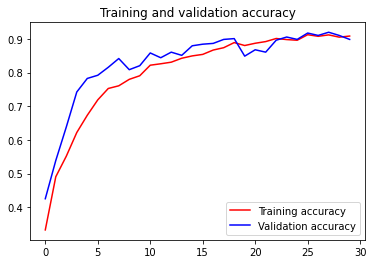

<Figure size 432x288 with 0 Axes>

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

<Figure size 432x288 with 0 Axes>

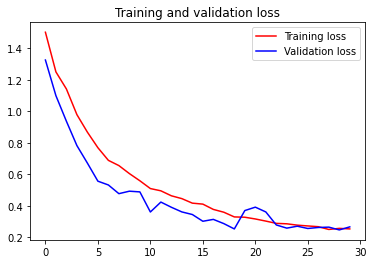

<Figure size 432x288 with 0 Axes>

In [42]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [47]:
print("Training Accuracy = {}".format(acc[-1]))
print("Validation Accuracy = {}".format(val_acc[-1]))

Training Accuracy = 0.9083002209663391
Validation Accuracy = 0.8983451724052429
